In [1]:
import os
import time

start = time.time()

if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [2]:
import json
import random
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.models as gm
from tqdm import tqdm
from gensim.models import KeyedVectors
import seaborn as sns
%load_ext memory_profiler

from badseeds import replicate_fig2
from badseeds import utils, seedbank, metrics, replicate_bolukbasi, replicate_fig4


In [3]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [4]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.rcParams["font.family"] = "serif"

In [6]:
# for replicability
np.random.seed(42)
random.seed(42)

## Models and Data

### Models

In [7]:
%%memit
models = []
# load google news word2vec
# Load vectors directly from the file
models.append(
    KeyedVectors.load_word2vec_format(
        os.path.join(
            config["models"]["dir_path"], config["models"]["google_news_subpath"]
        )
        + ".bin",
        binary=True,
    )
)

# replicate fig. 3 with NYT dataset
# get embeddings trained on NYT with min freq of 100

# direct = os.fsencode(
#     os.path.join(
#         config["models"]["dir_path"], config["models"]["nyt_subpath"]["100"]
#     )
# )

# for filename in os.listdir(direct):
#     f = os.path.join(direct, filename)

#     # checking if it is a file
#     if os.path.isfile(f):
#         f = os.fsdecode(f)
#         models.append(KeyedVectors.load(f))


peak memory: 4363.11 MiB, increment: 3940.24 MiB


### Seeds

In [8]:
%%memit
# get desired seeds:
seed = seedbank.seedbanking(config["seeds"]["dir_path"] + "seeds.json", index="ID")

gender_seed_list = [
    "definitional_female-Bolukbasi_et_al_2016",
    "definitional_male-Bolukbasi_et_al_2016",
]

# lower case seeds? she didnt do it in appendix (doesnt make sense tho)

seed_list = [seed.loc[seed_set]['Seeds'] for seed_set in gender_seed_list]
seed1 = [item for item in seed_list[0]]
seed2 = [item for item in seed_list[1]]

# hard coded shuffled seeds from paper
seed1_shuf = [
    "female",
    "she",
    "woman",
    "gal",
    "her",
    "daughter",
    "girl",
    "herself",
    "mother",
    "Mary",
]
#misses seed
seed2_shuf = [
    "John",
    "man",
    "son",
    "father",
    "male",
    "himself",
    "guy",
    "he",
    "his",
    "boy",
]

seed2_rnd = [
    "chun",
    "brush",
    "dictates",
    "caesar",
    "fewest",
    "breitbart",
    "rod",
    "heaped",
    "julianna",
    "longest",
]
seed1_rnd = [
    "negatives",
    "vel",
    "theirs",
    "canoe",
    "meet",
    "bilingual",
    "mor",
    "facets",
    "fari",
    "lily",
]

peak memory: 4365.48 MiB, increment: 1.94 MiB


### Function call

In [9]:
%%memit
(
    variance_ordered,
    variance_rnd,
    variance_inshuffle,
) = replicate_bolukbasi.pca_seeds_model(
    seed1, seed2, models, seed1_shuf, seed2_shuf, seed1_rnd, seed2_rnd, components=True
)




gender_pairs_words = [
    "herself",
    "ms",
    "her",
    "she",
    "pregnant",
    "pitching",
    "baseball",
    "syndergraad",
    "himself",
    "his",
]

random_pairs_words = [
    "likelihood",
    "eurozone",
    "incentive",
    "downturn",
    "setback",
    "photographed",
    "tales" "hood",
    "gracia",
    "danced",
]

shuffled_gender_pairs_words = [
    "outcomes",
    "son",
    "father",
    "mother",
    "aunt",
    "potentially",
    "male",
    "hood",
    "garcia",
    "md",
]

embed_a = utils.get_embeddings(gender_pairs_words, models, query_strat="average")
embed_b = utils.get_embeddings(random_pairs_words, models, query_strat="average")
embed_c = utils.get_embeddings(shuffled_gender_pairs_words, models, query_strat="average")



similarity = replicate_fig4.figure_4(
    variance_ordered, variance_rnd, variance_inshuffle, [embed_a, embed_b, embed_c]
)

gender_pairs_values, gender_pairs_words = zip(*sorted(zip(similarity[0], gender_pairs_words)))
random_pairs_values, random_pairs_words = zip(*sorted(zip(similarity[1], random_pairs_words)))
shuffled_gender_pairs_values, shuffled_gender_pairs_words = zip(*sorted(zip(similarity[2], shuffled_gender_pairs_words)))


gender_pairs_values = np.asarray(gender_pairs_values)
random_pairs_values = np.asarray(random_pairs_values)
shuffled_gender_pairs_values = np.asarray(shuffled_gender_pairs_values)

"Key 'breitbart' not present"
"Key 'fari' not present"
"Key 'breitbart' not present"
"Key 'fari' not present"
"Key 'breitbart' not present"
"Key 'fari' not present"
peak memory: 4366.57 MiB, increment: 1.09 MiB


### Results

In [10]:
print(gender_pairs_values, "\n",gender_pairs_words, "\n")
print(random_pairs_values, "\n", random_pairs_words, "\n")
print(shuffled_gender_pairs_values, "\n", shuffled_gender_pairs_words, "\n")

[-0.24848619 -0.18886984 -0.15877092 -0.14988211 -0.01031006 -0.00227603
  0.0615576   0.06684769  0.20831149] 
 ('she', 'pregnant', 'her', 'herself', 'ms', 'baseball', 'pitching', 'syndergraad', 'himself') 

[-0.05516514  0.01395331  0.04913758  0.05149749  0.05356309  0.06345619
  0.07213248] 
 ('taleshood', 'eurozone', 'photographed', 'incentive', 'setback', 'downturn', 'likelihood') 

[-0.35281729 -0.33551498 -0.21511198 -0.20075785 -0.02319645  0.04554746
  0.04738369  0.05119224  0.0894946   0.40258539] 
 ('mother', 'aunt', 'father', 'son', 'garcia', 'hood', 'md', 'outcomes', 'potentially', 'male') 



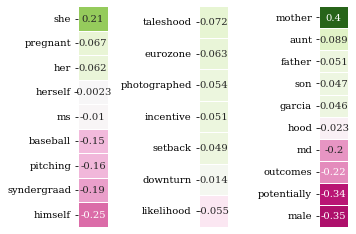

peak memory: 4363.11 MiB, increment: 2.90 MiB


In [11]:
%%memit
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=6.50127, h=5)
fig.tight_layout(rect=[0, 0, 0.9, 1], pad=6)

all_values = np.concatenate(
    [gender_pairs_values, random_pairs_values, shuffled_gender_pairs_values]
)
vmin, vmax = np.min(all_values), np.max(all_values)

ax1 = sns.heatmap(
    gender_pairs_values[::-1, np.newaxis],
    yticklabels=gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax1,
    cbar=False,
    annot=True,
    center=np.zeros(1),
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=10)


ax2 = sns.heatmap(
    random_pairs_values[::-1, np.newaxis],
    yticklabels=random_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax2,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=10)

ax3 = sns.heatmap(
    shuffled_gender_pairs_values[::-1, np.newaxis],
    yticklabels=shuffled_gender_pairs_words,
    xticklabels=[],
    cmap=plt.get_cmap("PiYG"),
    ax=ax3,
    cbar=False,
    annot=True,
    center=0,
    linewidths=0.5,
    vmin=vmin,
    vmax=vmax,
)
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=10)

# f.set_tight_layout(True)
plt.show()

In [12]:
# # save to latex
# plt.rc("pgf", texsystem="pdflatex")
# fig.savefig("images/fig_4.pgf", bbox_inches="tight")

In [13]:
print("Time taken is: ", time.time() - start)

Time taken is:  22.076664686203003
